# Exploratory Data Analysis: Global CO₂ Emissions

In this notebook, we'll perform an initial analysis of the `owid-co2-data.csv` dataset. The main goals are:

1.  Get familiar with the features, their types, and the overall structure.

2.  Identify missing values, filter irrelevant data, and select the features needed for our clustering analysis.

3.  Save a smaller version of the dataset that will be fed into our Kafka-Spark data pipeline.

---

In [ ]:
!pip install pandas numpy matplotlib seaborn -q

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/owid-co2-data.csv')

In [3]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50407 non-null  object 
 1   year                                       50407 non-null  int64  
 2   iso_code                                   42480 non-null  object 
 3   population                                 41167 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 29173 non-null  float64
 6   cement_co2_per_capita                      25648 non-null  float64
 7   co2                                        29384 non-null  float64
 8   co2_growth_abs                             27216 non-null  float64
 9   co2_growth_prct                            26239 non-null  float64
 10  co2_including_luc     

As we can see, we have many missing values and many variables...

In [5]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

First, let's understand which features have the highest number of missing values:

In [6]:
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

share_global_cumulative_other_co2       95.695042
share_global_other_co2                  95.695042
other_co2_per_capita                    94.724939
cumulative_other_co2                    93.544547
other_industry_co2                      93.544547
                                          ...    
share_of_temperature_change_from_ghg    18.660107
temperature_change_from_ghg             18.660107
temperature_change_from_co2             18.660107
population                              18.330787
iso_code                                15.725990
Length: 77, dtype: float64

Therefore, 77 out of 79 features have missing values.

Since the date is a very important variable and we consider it crucial for our problem, as well as the country, let's check the missing values by year

In [9]:
min_year, max_year = df["year"].min(), df["year"].max()
int(min_year), int(max_year)

(1750, 2024)

In [10]:
# since we have a lot of data, let's analyze this variable in 10-year intervals
df["year_bin"] = pd.cut(df["year"],  bins=range(min_year, max_year + 10, 10))

# calculate % of missing values per bin
def percent(x):
    return x.isna().mean() * 100

/tmp/ipykernel_32212/3022804371.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_bin_col = df.groupby("year_bin")[col].apply(percent)


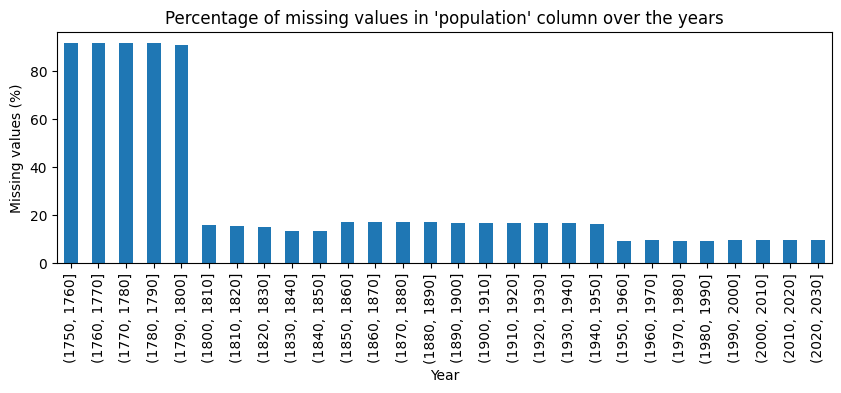

In [11]:
col = "population"   # all samples have country

missing_by_bin_col = df.groupby("year_bin")[col].apply(percent)
missing_by_bin_col.plot(kind="bar", figsize=(10,3))
plt.title(f"Percentage of missing values in '{col}' column over the years")
plt.ylabel("Missing values (%)")
plt.xlabel("Year")
plt.show()

In [12]:
df_v2 = df[df["year"] >= 1800]

In [13]:
missing_pct = df_v2.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

share_global_other_co2                  95.430040
share_global_cumulative_other_co2       95.430040
other_co2_per_capita                    94.410749
cumulative_other_co2                    93.463061
other_industry_co2                      93.463061
                                          ...    
iso_code                                14.693370
population                              13.810968
share_of_temperature_change_from_ghg    13.653020
temperature_change_from_ghg             13.653020
temperature_change_from_co2             13.653020
Length: 77, dtype: float64

We still have many missing values.

The best approach will be to analyze all existing features and choose those that make the most sense for our clustering objective.

We've chosen those that explain differences in countries' emissions:
- population size (demographic scale),
- economic activity (production scale),
- total emissions (absolute impact),
- emissions per capita (efficiency/intensity),
- temporal evolution (trends over the years).

In [14]:
columns = ["country", "year", "iso_code", "population", "gdp", "co2", "co2_per_capita"]

In [15]:
df_v3 = df_v2[columns]

In [16]:
non_country_entities = df_v3[df_v3['iso_code'].isnull()]['country'].unique()

print(f"Found {len(non_country_entities)} aggregate entities to remove. Examples:")
for entity in non_country_entities:
    print("-", entity)

Found 36 aggregate entities to remove. Examples:
- Africa
- Africa (GCP)
- Asia
- Asia (GCP)
- Asia (excl. China and India)
- Central America (GCP)
- Europe
- Europe (GCP)
- Europe (excl. EU-27)
- Europe (excl. EU-28)
- European Union (27)
- European Union (28)
- High-income countries
- International aviation
- International shipping
- Kosovo
- Kuwaiti Oil Fires
- Kuwaiti Oil Fires (GCP)
- Least developed countries (Jones et al.)
- Low-income countries
- Lower-middle-income countries
- Middle East (GCP)
- Non-OECD (GCP)
- North America
- North America (GCP)
- North America (excl. USA)
- OECD (GCP)
- OECD (Jones et al.)
- Oceania
- Oceania (GCP)
- Ryukyu Islands
- Ryukyu Islands (GCP)
- South America
- South America (GCP)
- Upper-middle-income countries
- World


In [17]:
df_countries_only = df_v3.dropna(subset=['iso_code'])
print(f"Shape after: {df_countries_only.shape}")

Shape after: (40507, 7)


It's important to keep this in mind in Spark, but if we're going to remove missing values later, it's ok

In [18]:
df_v3.shape

(47484, 7)

In [19]:
missing_pct = df_v3.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

gdp               67.881813
co2_per_capita    44.326510
co2               39.720748
iso_code          14.693370
population        13.810968
dtype: float64

Many missing values, especially for GDP... what if we only use data from 1950 onwards?

In [20]:
df_v4 = df_v3[df_v3['year']>= 1950]
df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18980 entries, 200 to 50406
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         18980 non-null  object 
 1   year            18980 non-null  int64  
 2   iso_code        16350 non-null  object 
 3   population      17175 non-null  float64
 4   gdp             11472 non-null  float64
 5   co2             17547 non-null  float64
 6   co2_per_capita  16493 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [21]:
missing_pct = df_v4.isna().mean().sort_values(ascending=False) * 100
missing_pct[missing_pct > 0]

gdp               39.557429
iso_code          13.856691
co2_per_capita    13.103267
population         9.510011
co2                7.550053
dtype: float64

Still many missing values... if we removed all missing values, would we have enough data?

In [22]:
missing_counts = df_v4.isna().sum()                     # count
missing_pct = df_v4.isna().mean() * 100                 # percentage

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": (missing_pct).round(2)
})

missing_summary

,missing_count,missing_pct
country,0,0.00
year,0,0.00
iso_code,2630,13.86
population,1805,9.51
gdp,7508,39.56
co2,1433,7.55
co2_per_capita,2487,13.10


In [23]:
df_v4.shape

(18980, 7)

In [24]:
df.duplicated().sum()

np.int64(0)

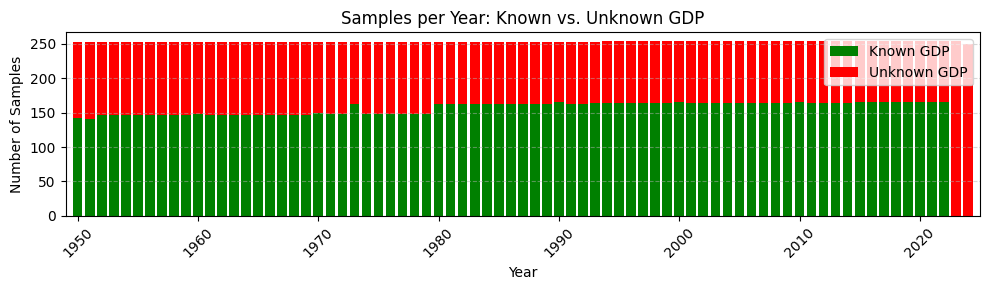

In [25]:
df_plot = df_v4.copy()
total_per_year = df_plot.groupby('year').size()

known_per_year = df_plot[df_plot['gdp'].notna()].groupby('year').size()
years = total_per_year.index
known_per_year = known_per_year.reindex(years, fill_value=0)

unknown_per_year = total_per_year - known_per_year

plt.figure(figsize=(10, 3))

plt.bar(years, known_per_year, color='green', label='Known GDP', width=0.8)
plt.bar(years, unknown_per_year, bottom=known_per_year, color='red', label='Unknown GDP', width=0.8)

plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.title('Samples per Year: Known vs. Unknown GDP')
plt.legend()

plt.xticks(np.arange(years.min(), years.max() + 1, 10), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(years.min() - 1, years.max() + 1) 

plt.tight_layout()
plt.show()

In the last 2 years we don't have any GDP data. Therefore, it doesn't make sense for us to include this data in our project

In [26]:
df_v5 = df_v4[df_v4['year']<= 2022]
df_v5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18476 entries, 200 to 50404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         18476 non-null  object 
 1   year            18476 non-null  int64  
 2   iso_code        15914 non-null  object 
 3   population      16717 non-null  float64
 4   gdp             11472 non-null  float64
 5   co2             17053 non-null  float64
 6   co2_per_capita  16031 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
missing_counts = df_v5.isna().sum()                     # count
missing_pct = df_v5.isna().mean() * 100                 # percentage

missing_summary = pd.DataFrame({"missing_count": missing_counts, "missing_pct": (missing_pct).round(2)})
missing_summary

,missing_count,missing_pct
country,0,0.00
year,0,0.00
iso_code,2562,13.87
population,1759,9.52
gdp,7004,37.91
co2,1423,7.70
co2_per_capita,2445,13.23


OK, since the Spark service will already handle problems like missing values, duplicates, etc., there's no problem keeping them... after all, it will filter and deal with missing values, etc.

---
Let's save the data

In [28]:
df_v4.to_csv('../data/reduced_co2.csv', index=False)

---
In this part, we'll analyze our data a bit, out of curiosity

In [29]:
df_final = df_v5.copy()
df_final.head()

,country,year,iso_code,population,gdp,co2,co2_per_capita
200,Afghanistan,1950,AFG,7776180.0,9.421400e+09,0.084,0.011
201,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.092,0.012
202,Afghanistan,1952,AFG,7987784.0,1.001732e+10,0.092,0.011
203,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.106,0.013
204,Afghanistan,1954,AFG,8207954.0,1.086636e+10,0.106,0.013


In [30]:
df_final.shape

(18476, 7)

In [31]:
df_aux = df_final.copy()
df_au = df_aux.dropna()
df_au.shape

(11237, 7)

We have 11237 real values (post-Spark transformation), but the dataset currently has 18476 data points

In [32]:
df_final['country'].value_counts()

country
Afghanistan                73
Africa                     73
Africa (GCP)               73
Albania                    73
Algeria                    73
                           ..
Wallis and Futuna          73
Zimbabwe                   73
Yemen                      73
Ryukyu Islands (GCP)       50
Kuwaiti Oil Fires (GCP)    30
Name: count, Length: 254, dtype: int64

We have 254 country entries

In [33]:
df_final['co2_per_capita'].describe()

count    16031.000000
mean         5.367044
std         17.945877
min          0.000000
25%          0.450000
50%          2.104000
75%          6.612500
max        782.743000
Name: co2_per_capita, dtype: float64

In [34]:
df_final['co2'].describe()

count    17053.000000
mean       602.367842
std       2444.431936
min          0.000000
25%          0.660000
50%          7.789000
75%         85.936000
max      37527.773000
Name: co2, dtype: float64

In [35]:
df_final['gdp'].describe()

count    1.147200e+04
mean     4.130017e+11
std      3.552073e+12
min      4.998000e+07
25%      8.479572e+09
50%      3.224005e+10
75%      1.532196e+11
max      1.301126e+14
Name: gdp, dtype: float64

In [36]:
co2_per_country = df_final.groupby('country')['co2'].mean().sort_values(ascending=False).head(10)
print("Top 10 countries with highest average CO2:")
print(co2_per_country)

Top 10 countries with highest average CO2:
country
World                            21184.541548
High-income countries            12499.386329
OECD (GCP)                       10497.665575
Non-OECD (GCP)                   10089.584795
Asia                              7771.370260
Asia (GCP)                        6759.832904
Upper-middle-income countries     6517.808658
Europe                            5886.515479
Europe (GCP)                      5886.515438
North America                     5380.529425
Name: co2, dtype: float64


In [37]:
cols = ["population", "gdp", "co2", "co2_per_capita"]
corr = df_final[cols].corr()
print("Correlation between variables:")
print(corr)

Correlation between variables:
                population       gdp       co2  co2_per_capita
population        1.000000  0.918294  0.883774       -0.012786
gdp               0.918294  1.000000  0.968149        0.053257
co2               0.883774  0.968149  1.000000        0.026098
co2_per_capita   -0.012786  0.053257  0.026098        1.000000


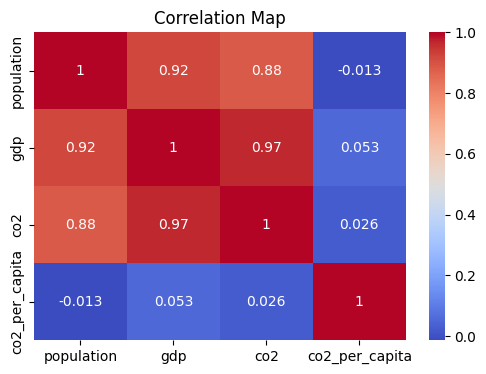

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

#### Questions that seem interesting to ask based on our analysis:

- How has global CO2 increased over the years?
- What was the growth rate year-over-year?
- Did emissions drop during wars, recessions, or COVID?

- Top polluters by total
- Top polluters per capita
- Who improved? Who got worse?

- Does more GDP = more CO2?
- Are rich countries more efficient (lower CO2 per capita)?
- Can countries grow economically while reducing emissions?